# Draw figure S2

In [60]:
import torch
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

import matplotlib.pyplot as plt
from pathlib import Path
import math

from scipy.io import loadmat
import mat73

datapath = Path('./data/').expanduser()
loaded = torch.load(datapath/'torch_testv1.pt') # new J and GC^T with threashold 1e-6
loaded1 = torch.load(datapath/'LinlogJ.pt')
matload = loadmat("./data/newEGCnstd.mat")
EGC_m_std = torch.tensor(matload["EGC_m_std"])
Outputs = loaded['Outputs']
Ns_span = loaded['Ns_span']
rho_span = loaded['rho_span']
Nr = loaded['Nr']
num_try = Outputs.size(dim = 1)

Jnewout = loaded1['Jnewout'] # for linear and logisitc supply

Outputs[2] = EGC_m_std[0]

## $GC^\top$ and Jacobian $J$

test logistic growth supply

In [61]:
NsnNr = torch.ones(num_try,len(Ns_span),len(rho_span)) * (torch.tensor(Ns_span).view(1,len(Ns_span)).transpose(0,1) * torch.ones(1,len(rho_span))) + Nr

Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

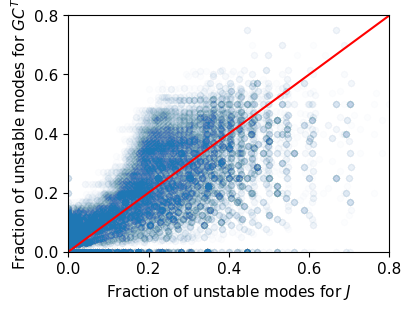

In [62]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Jnewout[1] * Nr / NsnNr ,Outputs[1], alpha=.01, s=20)
plt.plot(torch.linspace(.0,.8, steps=100),torch.linspace(.0,.8, steps=100),'r')

plt.xlim(.0,.8)
plt.ylim(.0,.8)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

In [63]:
# constant supply

mean_FU_J = torch.mean(Outputs[0],0)
mean_FU_GC = torch.mean(Outputs[1],0)

x0_mean = []
y0_mean = []
x0_std = []
y0_std = []


for i in range(12):
    indeces = ((i*0.05<=mean_FU_J) & (mean_FU_J<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_J[indeces]
    y_group = mean_FU_GC[indeces]
    if x_group.size() != torch.Size([0]):
        x0_mean.append(torch.mean(x_group))
        x0_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y0_mean.append(torch.mean(y_group))
        y0_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))


In [64]:
# linear supply

mean_FU_JLin = torch.mean(Jnewout[0],0)
mean_FU_GCLin = torch.mean(Outputs[1],0)

x1_mean = []
y1_mean = []
x1_std = []
y1_std = []

for i in range(12):
    indeces = ((i*0.05<=mean_FU_JLin) & (mean_FU_JLin<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_JLin[indeces]
    y_group = mean_FU_GCLin[indeces]
    if x_group.size() != torch.Size([0]):
        x1_mean.append(torch.mean(x_group))
        x1_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y1_mean.append(torch.mean(y_group))
        y1_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))


In [65]:
# logistic supply 

#mean_FU_JLog = torch.mean(Jnewout[1],0)
mean_FU_JLog = torch.mean(Jnewout[1] * Nr / NsnNr,0)
mean_FU_GCLog = torch.mean(Outputs[1],0)

x2_mean = []
y2_mean = []
x2_std = []
y2_std = []

for i in range(12):
    indeces = ((i*0.05<=mean_FU_JLog) & (mean_FU_JLog<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_JLog[indeces]
    y_group = mean_FU_GCLog[indeces]
    if x_group.size() != torch.Size([0]):
        x2_mean.append(torch.mean(x_group))
        x2_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y2_mean.append(torch.mean(y_group))
        y2_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

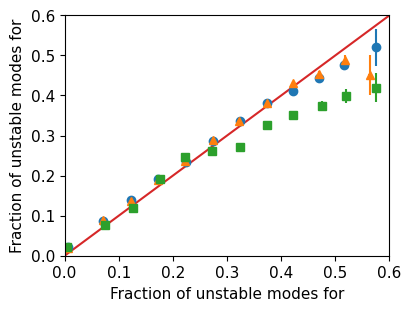

In [66]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x0_mean,y0_mean, xerr=x0_std, yerr= y0_std, marker = 'o', ls='none')
plt.errorbar(x1_mean,y1_mean, xerr=x1_std, yerr= y1_std, marker = '^', ls='none')
plt.errorbar(x2_mean,y2_mean, xerr=x2_std, yerr= y2_std, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100))
#plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100)**2)

plt.xlim(.0,.6)
plt.ylim(.0,.6)
plt.xlabel('Fraction of unstable modes for') #$J$
plt.ylabel('Fraction of unstable modes for') #$GC^T$

plt.savefig('../figures/FigS3emb1.eps', format='eps')

## Jacobian $J$ and encroachment $E(G,C)$

In [67]:
# constant
x_mean = []
umJ_mean = []
x_std = []
umJ_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2]) & (Outputs[2]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = Outputs[0][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_mean.append(torch.mean(y_group))
        umJ_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [68]:
# linear
x_mean = []
umJ_meanLi = []
x_std = []
umJ_stdLi = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2]) & (Outputs[2]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = Jnewout[0][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_meanLi.append(torch.mean(y_group))
        umJ_stdLi.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [69]:
# logistic
x_mean = []
umJ_meanLo = []
x_std = []
umJ_stdLo = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2]) & (Outputs[2]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = (Jnewout[1] * Nr / NsnNr)[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_meanLo.append(torch.mean(y_group))
        umJ_stdLo.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

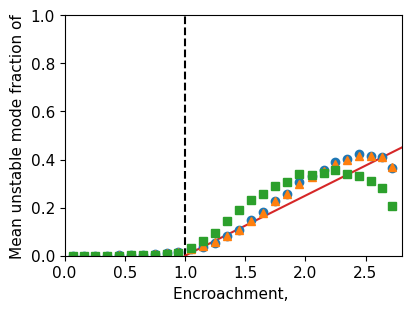

In [70]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,umJ_mean, xerr=x_std, yerr= umJ_std, marker = 'o', ls='none')
plt.errorbar(x_mean,umJ_meanLi, xerr=x_std, yerr= umJ_stdLi, marker = '^', ls='none')
plt.errorbar(x_mean,umJ_meanLo, xerr=x_std, yerr= umJ_stdLo, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(1,1, steps=100),torch.linspace(.0,1.0, steps=100),'--k')
plt.plot(torch.linspace(1.0,2.8, steps=100),torch.linspace(0.0,0.45, steps=100))

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, ') #$E(G,C)$
plt.ylabel('Mean unstable mode fraction of') #$J$

plt.savefig('../figures/FigS3emb2.eps', format='eps')

## Fraction of unstable communities vs. encroachment

In [71]:
# constant supp

unstable = (Outputs[0] > 0.1).float()

x_mean = []
uf_mean = []
x_std = []
uf_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = unstable[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        uf_mean.append(torch.mean(y_group))
        uf_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [72]:
# linear
unstableLi = (Jnewout[0] > 0.1).float()
x_mean = []
ufLi_mean = []
x_std = []
ufLi_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = unstableLi[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufLi_mean.append(torch.mean(y_group))
        ufLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [73]:
# logistic supply
unstableLo = ((Jnewout[1] * Nr / NsnNr) > 0.1).float()
x_mean = []
ufLo_mean = []
x_std = []
ufLo_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = unstableLo[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufLo_mean.append(torch.mean(y_group))
        ufLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

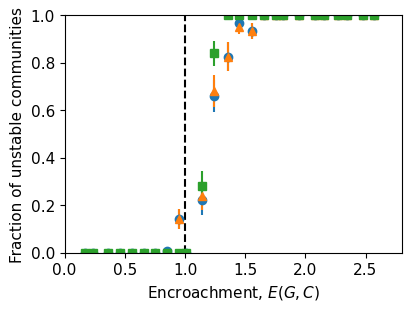

In [74]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,uf_mean, xerr=x_std, yerr= uf_std, marker = 'o', ls='none')
plt.errorbar(x_mean,ufLi_mean, xerr=x_std, yerr= ufLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,ufLo_mean, xerr=x_std, yerr= ufLo_std, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(1.0,1.0, steps=100),torch.linspace(.0,1.0, steps=100),'--k')

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of unstable communities')

plt.savefig('../figures/FigS3emb3.eps', format='eps')

## encroachment vs fraction of survival

In [75]:
Fractions = (torch.load('./data/Jul18/allFractionsSP.pt')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)

x_mean = []
sur_mean = []
x_std = []
sur_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = Fractions[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        sur_mean.append(torch.mean(y_group))
        sur_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [76]:
FracLin = torch.tensor(mat73.loadmat('./data/Sep3/Dis0.1SimuFractionsLin.mat')['Fractions'], dtype=torch.float32).transpose(0,1).transpose(1,2).transpose(0,3)

x_mean = []
surLi_mean = []
x_std = []
surLi_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = FracLin[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLi_mean.append(torch.mean(y_group))
        surLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [77]:
FracLog = torch.tensor(mat73.loadmat('./data/Sep3/Dis0.1SimuFractionsLogVCABM3.mat')['Fractions'], dtype=torch.float32).transpose(0,1).transpose(1,2).transpose(0,3)

x_mean = []
surLo_mean = []
x_std = []
surLo_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = FracLog[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLo_mean.append(torch.mean(y_group))
        surLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

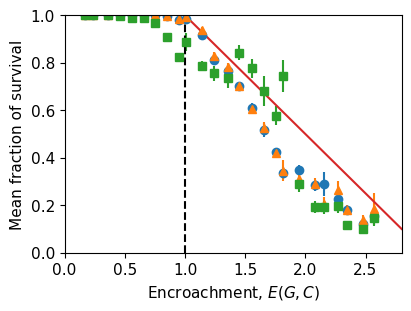

In [78]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,sur_mean, xerr=x_std, yerr= sur_std, marker = 'o', ls='none')
plt.errorbar(x_mean,surLi_mean, xerr=x_std, yerr= surLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,surLo_mean, xerr=x_std, yerr= surLo_std, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'],loc='lower left')
plt.plot(torch.linspace(1,1, steps=100),torch.linspace(.0,1.0, steps=100),'--k')
plt.plot(torch.linspace(1.0,2.8, steps=100),torch.linspace(1.0,0.1, steps=100))

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of survival')

plt.savefig('../figures/FigS3emb4.eps', format='eps')

## Fraction of survival vs. fraction of unstable modes

In [28]:
umJ_mean = []
sur_mean = []
umJ_std = []
sur_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[0,:,28,:]) & (Outputs[0,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[0,:,28,:][indeces]
    y_group = Fractions[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJ_mean.append(torch.mean(x_group))
        umJ_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        sur_mean.append(torch.mean(y_group))
        sur_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [29]:
umJLi_mean = []
surLi_mean = []
umJLi_std = []
surLi_std = []

for i in range(28):
    indeces = ((i*0.05<=Jnewout[0,:,28,:]) & (Jnewout[0,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Jnewout[0,:,28,:][indeces]
    y_group = FracLin[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJLi_mean.append(torch.mean(x_group))
        umJLi_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLi_mean.append(torch.mean(y_group))
        surLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [30]:
umJLo_mean = []
surLo_mean = []
umJLo_std = []
surLo_std = []

for i in range(28):
    indeces = ((i*0.05<=Jnewout[1,:,28,:]) & (Jnewout[1,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    #x_group = Jnewout[1,:,28,:][indeces]
    x_group = (Jnewout[1] * Nr / NsnNr)[:,28,:][indeces]
    y_group = FracLog[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJLo_mean.append(torch.mean(x_group))
        umJLo_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLo_mean.append(torch.mean(y_group))
        surLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

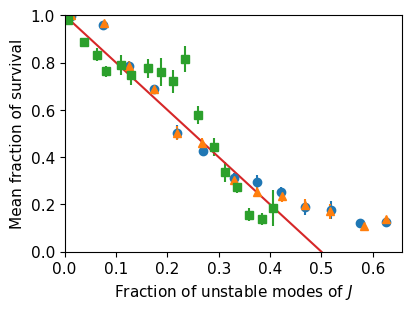

In [31]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(umJ_mean,sur_mean, xerr=umJ_std, yerr= sur_std, marker = 'o', ls='none')
plt.errorbar(umJLi_mean,surLi_mean, xerr=umJLi_std, yerr= surLi_std, marker = '^', ls='none')
plt.errorbar(umJLo_mean,surLo_mean, xerr=umJLo_std, yerr= surLo_std, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(0.0,.5, steps=100),torch.linspace(1.0,0.0, steps=100))

plt.xlim(.0, )
plt.ylim(.0,1.0)
plt.xlabel('Fraction of unstable modes of $J$')
plt.ylabel('Mean fraction of survival')
plt.savefig('../figures/FigS3emb5.eps', format='eps')

## Fraction of fluctuation

In [32]:
x_mean = []
fl_mean = []
x_std = []
fl_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = Fractions[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        fl_mean.append(torch.mean(y_group))
        fl_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [33]:
x_mean = []
flLi_mean = []
x_std = []
flLi_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLin[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        flLi_mean.append(torch.mean(y_group))
        flLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [34]:
x_mean = []
flLo_mean = []
x_std = []
flLo_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLog[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        flLo_mean.append(torch.mean(y_group))
        flLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of fluctuation')

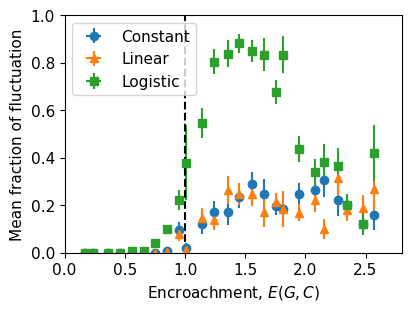

In [35]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,fl_mean, xerr=x_std, yerr= fl_std, marker = 'o', ls='none')
plt.errorbar(x_mean,flLi_mean, xerr=x_std, yerr= flLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,flLo_mean, xerr=x_std, yerr= flLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'],loc='upper left')
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of fluctuation')

#plt.savefig('./figures/FlucsvsE.eps', format='eps')

## Fraction of alternative stable states

In [36]:
x_mean = []
ms_mean = []
x_std = []
ms_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = Fractions[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ms_mean.append(torch.mean(y_group))
        ms_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [37]:
x_mean = []
msLi_mean = []
x_std = []
msLi_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLin[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        msLi_mean.append(torch.mean(y_group))
        msLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [38]:
x_mean = []
msLo_mean = []
x_std = []
msLo_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLog[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        msLo_mean.append(torch.mean(y_group))
        msLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of multiple steady states')

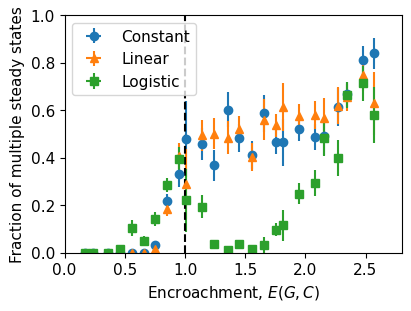

In [39]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,ms_mean, xerr=x_std, yerr= ms_std, marker = 'o', ls='none')
plt.errorbar(x_mean,msLi_mean, xerr=x_std, yerr= msLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,msLo_mean, xerr=x_std, yerr= msLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'],loc='upper left')
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of multiple steady states')
#plt.savefig('./figures/MulSteadyvsE.eps', format='eps')

## LS fully coexisting

In [40]:
LSf = ((Fractions[1] == 0.0) & (Fractions[0] >= 0.9)).float()

In [41]:
x_mean = []
gs_mean = []
x_std = []
gs_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = LSf[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        gs_mean.append(torch.mean(y_group))
        gs_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [42]:
LSfLin = ((FracLin[1] == 0.0) & (FracLin[0] >= 0.9)).float()

In [43]:
x_mean = []
gsLi_mean = []
x_std = []
gsLi_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = LSfLin[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        gsLi_mean.append(torch.mean(y_group))
        gsLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

In [44]:
LSfLog = ((FracLog[1] == 0.0) & (FracLog[0] >= 0.9)).float()

In [45]:
x_mean = []
gsLo_mean = []
x_std = []
gsLo_std = []

for i in range(28):
    indeces = ((i*0.1<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = LSfLog[:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        gsLo_mean.append(torch.mean(y_group))
        gsLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

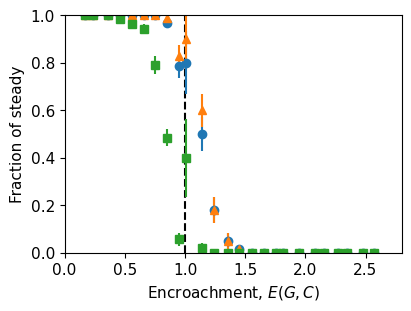

In [47]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')
plt.errorbar(x_mean,gs_mean, xerr=x_std, yerr= gs_std, marker = 'o', ls='none')
plt.errorbar(x_mean,gsLi_mean, xerr=x_std, yerr= gsLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,gsLo_mean, xerr=x_std, yerr= gsLo_std, marker = 's', ls='none')
#plt.legend(['Constant','Linear','Logistic'],loc='upper left')

plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of steady')
plt.savefig('../figures/FigS3emb6.eps', format='eps')